# Выпускной проект. Банки — сегментация пользователей по потреблению.

**Описание проекта:**


Проект посвящен сегментированию пользователей банка по потреблению. Выделив клиентов банка "Метанпромбанк" в сегменты, сможем оценить и предугадать их поведение и дать рекомендации по удержанию сегментов.  
 

Цель - определить, на какие основные сегменты делятся клиенты банка, выявить характеристики каждого сегмента, дать рекомендации заказчику по внедрению новых продуктов для уменьшения оттока.

**Задача**:

Проанализируем клиентов регионального банка и сегментируем пользователей по количеству потребляемых продуктов.

- Проведем исследовательский анализ данных,
- Сегментируем пользователей на основе данных о количестве потребляемых продуктов,
- Сформулируем и проверим статистические гипотезы.
    
    *Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*
    
    *Сформулируем и проверим статистическую гипотезу относительно представленных данных.*

 **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

[Ссылка на презентацию](https://disk.yandex.ru/i/3jZT_fe3n4J0kQ)

[Ссылка на дашборд](https://public.tableau.com/app/profile/miluetta.vodolazova/viz/_2_16545087658770/Dashboard1?publish=yes)

## Загрузка данных

Вызываем все необходимые библиотеки, открываем файл.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats as st
from statsmodels.stats import weightstats as stests
import math as mth

import warnings 
warnings.simplefilter("ignore")

In [2]:
try:
    bank = pd.read_csv('bank_dataset.csv')
except:
    bank = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
bank.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [53]:
bank.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


## Предобработка данных

Для дальнейшей работы поправим названия столбцов, чтобы быстрее в них ориентироваться, потому что они все имеют разный стиль. Поищем и обработаем дубликаты, пропуски. Проверим соответствие типов и т.д.

In [5]:
bank.columns = bank.columns.str.lower()
bank.rename(columns={'userid':'user_id', 'creditcard':'credit_card'}, inplace=True)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Типы данных в столбцах соответсвуют необходимым. Пропуски обнаружены только в одном столбце *balance*.

In [7]:
bank['balance'].isna().mean() * 100

36.17

Всего более 36% пропусков в столбце, что является большой частью данных, которую не совсем логично обрабатывать. Далее попробуем выяснить отчего могло возникнуть столько пропущенных значений.

In [8]:
bank.duplicated().sum()

0

Попробуем удалить столбец с индивидуальным id и поискать дубли без него.

In [9]:
#bank = bank.drop(columns=['user_id'])
bank.duplicated().sum()

0

In [35]:
nan_balance = bank[bank['balance'].isna()]
nan_balance.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,3617.00,3617.00,3617.00,3617.00,0.00,3617.00,3617.00,3617.00,3617.00,3617.00
mean,15734685.59,649.45,38.43,5.07,NaN,1.78,0.72,0.52,98983.56,0.14
std,71947.49,96.16,10.49,2.86,NaN,0.50,0.45,0.50,57730.83,0.35
min,15608442.00,350.00,18.00,0.00,NaN,1.00,0.00,0.00,90.07,0.00
25%,15672255.00,583.00,31.00,3.00,NaN,1.00,0.00,0.00,49506.82,0.00
50%,15736083.00,651.00,37.00,5.00,NaN,2.00,1.00,1.00,98618.79,0.00
75%,15796286.00,717.00,43.00,7.00,NaN,2.00,1.00,1.00,148330.97,0.00
max,15858100.00,850.00,88.00,10.00,NaN,4.00,1.00,1.00,199992.48,1.00


Мединные и средние значения для признаков `score`, `age`, `objects`, `estimated_salary`  не отличаются для данных без пропусков и с ними. Посмотрим есть ли различия в дискретных признаках. 

In [55]:
for feature in ['products', 'gender','credit_card', 'loyalty', 'city', 'churn']:
    display(nan_balance.groupby(feature).agg({'user_id': 'count'}))

,user_id
products,
1,905
2,2600
3,98
4,14


,user_id
gender,
Ж,1654
М,1963


,user_id
credit_card,
0,1025
1,2592


,user_id
loyalty,
0,1744
1,1873


,user_id
city,
Рыбинск,1199
Ярославль,2418


,user_id
churn,
0,3117
1,500


In [56]:
bank.groupby('city').agg({'user_id': 'count'})

,user_id
city,
Ростов Великий,2509
Рыбинск,2477
Ярославль,5014


В городе Ростов Великий нет ни одного пропуска, вероятно связь именно с городами. Возможно в городе Ростов Великий были первыми введены обновления/форма записи, в которой уже присутствовала колонка balance, и данные для датасета сохраняли уже после введения. 

Или пропуски в данных появились случайно, при некорректной выгрузке.

**Вывод:**

Данные подготовлены для дальнейшего анализа.

## Исследовательский анализ данных

Приведем категориальные типы данных к числовым по необходимости. Построим графики распределения признаков в разрезе оттока. Построим матрицу корреляций признаков, узнаем есть ли характерные признаки влияющие на отток. 

In [10]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.00,15733676.57,71936.19,15608437.00,15671264.25,15733474.00,15795969.75,15858426.00
score,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
objects,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
balance,6383.00,119827.49,30095.06,3768.69,100181.98,119839.69,139512.29,250898.09
products,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
credit_card,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
loyalty,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
estimated_salary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
churn,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


- *score* - баллы кредитного скоринга имеют разброс с 350 до 850, среднее и медианное значение баллов около 650;
- *age* - возраст клиентов от 18 до 92 лет, средний возраст - 37-39 лет;
- *objects* - количество объектов во владении до 10, в среднем их 5;
- *balance* - минимальный баланс - около 4 тыс. у.е., максимальный - 251 тыс. у.е., среднее и медианное значение баланса около 120 тыс. у.е.. 
- *products* - всего у банка 4 продукта, в основном клиенты пользуются 1-2.
- *estimated_salary* - минимальная заработная плата - 12 у.е., средняя з/п около 100 тыс. у.е., скорее всего с минимальной з/п произошла ошибка.

In [11]:
#bank.query('estimated_salary < 1000').count() / bank['estimated_salary'].count() * 100

In [12]:
bank[['credit_card', 'loyalty', 'churn']].apply(pd.Series.value_counts)


,credit_card,loyalty,churn
0,2945,4849,7963
1,7055,5151,2037


- Около 70% клиентов банка имеют кредитные карты;
- Актиыных клиентов меньше половины;
- Покинули банк около 20% клиентов.

Проверим распределение в столбцах с полом и городом.

In [13]:
obj_cols = bank.select_dtypes(include=object).columns.tolist()
(pd.DataFrame(
    bank[obj_cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column value                 
city   Рыбинск           2477
       Ростов Великий    2509
       Ярославль         5014
gender Ж                 4543
       М                 5457

- Половина клиентов банка живет в городе Ярославль, в городах Рыбинск и Ростов Великий одинаковое распределение - около четверти от всех клиетнов;
- Количество мужчин в банке преобладает примерно на 10%.

Построим графики для всех признаков в разрезе оттока для наглядности.

### Построение столбчатых гистограмм и ящиков с усами для активных клиентов и тех, кто попал в отток.

Создадим функцию для количественных признаков. 

In [14]:
# Принимает на вход датафрейм bank, название признака feature и заголовок для графиков title
def cntns_feature_plots(bank, feature, title):
    fig, ax = plt.subplots(figsize = (12, 4))

    sns.distplot(bank[bank['churn']==0][feature], label = 'Активные клиенты', color = 'teal', ax = plt.subplot(1, 2, 1)) 
    sns.distplot(bank[bank['churn']==1][feature], label = 'Отток', color = 'gold', ax = plt.subplot(1, 2, 1))
    
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(color='silver')
    plt.legend()

    sns.boxplot(y = feature, x = 'churn', data = bank, palette='Set3', ax = plt.subplot(1, 2, 2)) 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Активные клиенты', 'Отток'))

    fig.suptitle(title)
    plt.show()

Составим списки с названиями числовых признаков и их заголовками на русском языке:

In [15]:
f_cnt_list = ['score', 'age', 'objects', 'balance', 'estimated_salary']
t_cnt_list = ['Баллы кредитного скоринга', 'Возраст', 'Количество объектов в собственности', 
              'Баланс на счете', 'Заработная плата клиента']
# Соберём их в DataFrame:
cnt_features = pd.DataFrame({'feature': f_cnt_list, 'title': t_cnt_list})

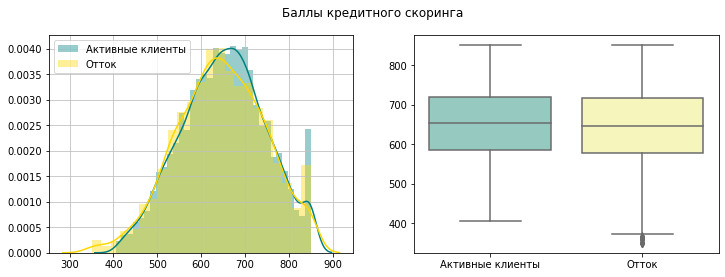

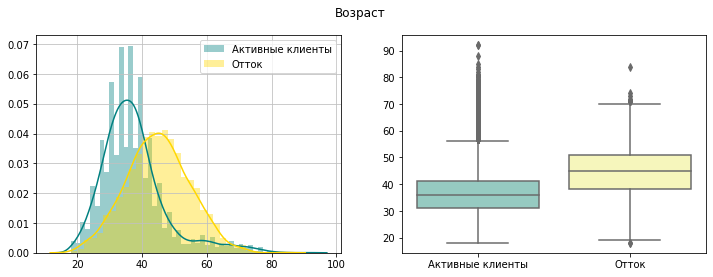

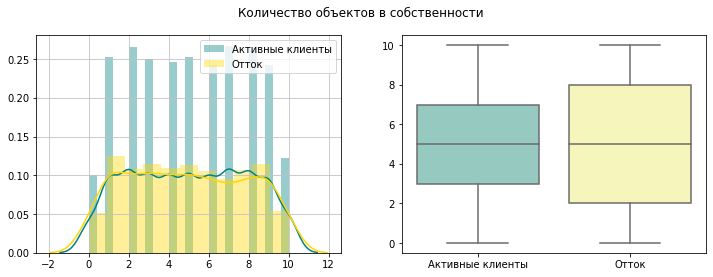

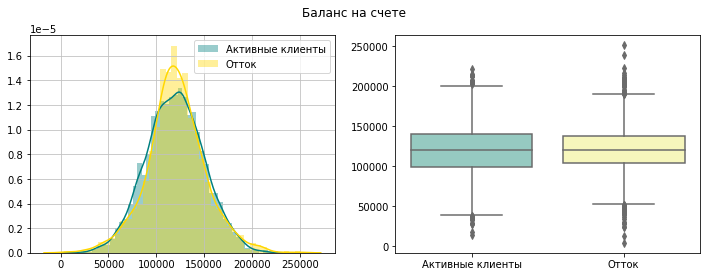

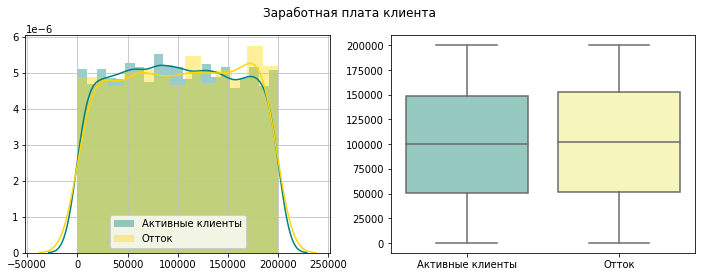

In [16]:
for index, row in cnt_features.iterrows():
    cntns_feature_plots(bank, row[0], row[1])

 #### Вывод:
 - Баллы кредитного скорринга у клиентов в группе оттока и действующих клиентов одинаковые;
 - На графиках с возрастом видим, что ушедшие клиенты старше оставшихся примерно на 10 лет;
 - Количество объектов в собственности для  бывших и оставшихся клиентов практически одинаково;
 - Баланс на счете распределен равномерно для обоих групп, но в группе оттока заметен более острый пик в области 100-150 тыс. у.е.;
 - Заработная плата клиентов судя по графикам тоже не влияет на факт оттока.

Теперь создадим похожую функцию, но для дискретных признаков.

In [17]:
def dscrt_feature_plots(bank, feature, title):
    fig, ax = plt.subplots(figsize = (12, 4))

    sns.countplot(x = feature, hue = 'churn', data = bank, palette='Set3', linewidth=2,
                   edgecolor='grey', ax = plt.subplot(1, 2, 1))
    plt.ylabel('')
    plt.xlabel('')
    plt.legend()
    plt.grid(color='silver')
    
    gr = bank.groupby([feature, 'churn']).agg(count=(feature, 'count')).reset_index()
    sns.boxplot(x = feature, y = 'count', data=gr, palette='Set3', ax = plt.subplot(1, 2, 2))
    
    plt.xlabel('')
    plt.ylabel('')
    
    

    fig.suptitle(title)
    plt.show()

In [18]:
f_dscrt_list = ['products', 'gender', 'city', 'credit_card', 'loyalty']
t_dscrt_list = ['Количество продуктов, которыми пользуется клиент', 'Пол', 'Город', 
                'Наличие кредитной карты', 'Активный клиент']

dscrt_features = pd.DataFrame({'feature': f_dscrt_list, 'title': t_dscrt_list})

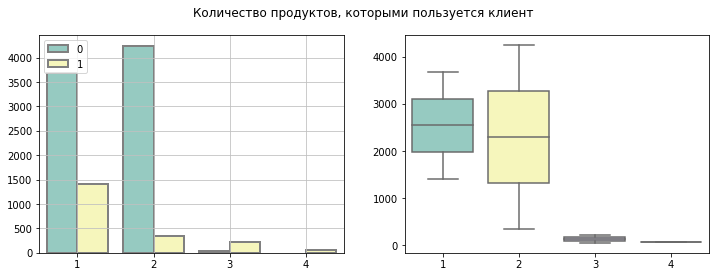

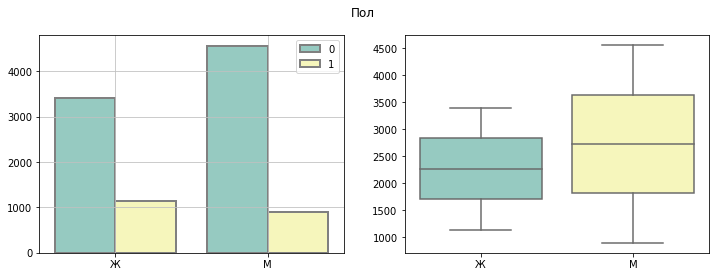

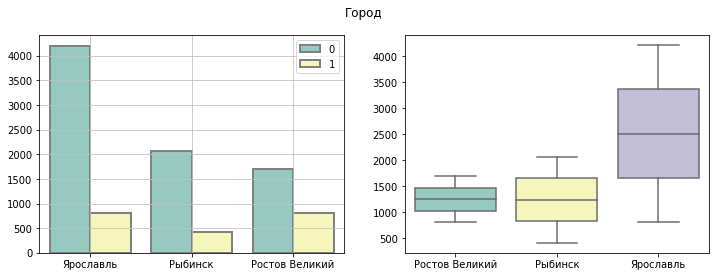

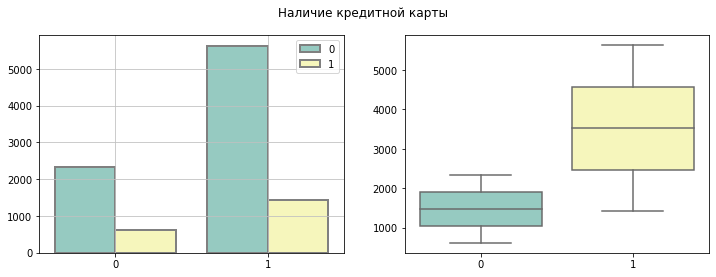

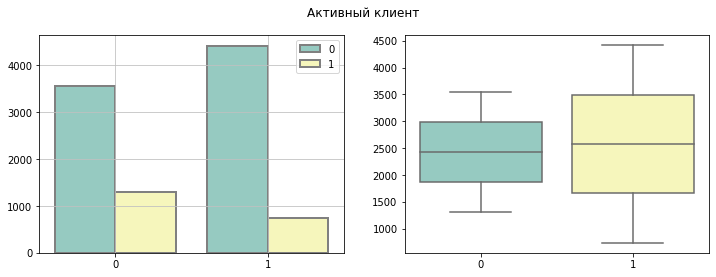

In [19]:
for index, row in dscrt_features.iterrows():
    dscrt_feature_plots(bank, row[0], row[1])

 #### Вывод:
 **Количество продуктов** (наш главный признак для исследования): 
- в сравнении между одним и двумя продуктами больший отток показывают клиенты с одним продуктом;
- очень большой процент оттока характерен для клиентов с тремя продуктами;
- 100%-ый максимальный отток характерен для клиентов с 4-мя продуктами;
- *можно сделать промежуточный вывод о том что клиенты с двумя продуктами показывают лучшее удержание*.


- Женщины покидают данный банк чаще, чем мужчины.
- Среди городов наибольшее количество клиентов в Ярославле, но худшее удержание в городе Ростов Великий(около половины клиентов в оттоке).
- Наличие кредитной карты не влияет на отток, по крайней мере на графике разницу сложно определить. Всего клиентов с кредитной картой в банке в 2-3 раза больше.




### Корреляционный анализ

Переведем категориальные столбцы текстового типа в числовые, чтобы они участвовали в корреляционном анализе.

Используем преобразование one-hot encoding.

In [20]:
bank_corr = bank.copy()

bank_corr = pd.get_dummies(bank_corr, columns=['gender','city'])
bank_corr.head()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,42,2,NaN,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
3,15744090,699,39,1,NaN,2,0,0,93826.63,0,1,0,0,0,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


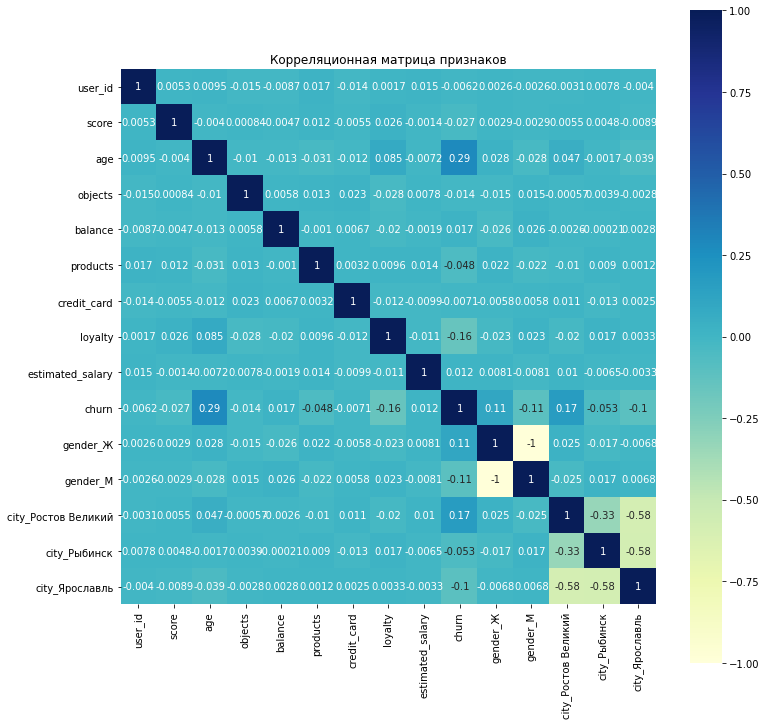

In [21]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(bank_corr.corr(), annot = True, fmt='.2g', square=True, cmap="YlGnBu")
ax.set_title("Корреляционная матрица признаков")
plt.show()

Сильной очевидной корреляции между признаками не наблюдается.  


Присутствуют очень слабые корреляции между признаками **Отток-Возраст** (положительная корр-ция 0.29), и **Отток-город Ростов Великий**(положительная корр-ция 0.17). 

## Сегментация пользователей на основе данных о количестве потребляемых продуктов

Вручную выделим сегменты в зависимости от количества продуктов клиента, выделим основные признаки каждого сегмента, особенно обращая внимание на отток. Построим графики для наглядного определения различий в признаках.

In [22]:
bank_corr.groupby('products').agg('mean').T 

products,1,2,3,4
user_id,15732367.90,15734841.49,15741816.49,15719361.27
score,649.12,652.19,648.11,653.58
age,39.67,37.75,43.20,45.68
objects,4.97,5.05,5.00,5.30
balance,119894.16,119660.94,119475.69,122260.61
credit_card,0.70,0.71,0.71,0.68
loyalty,0.50,0.53,0.42,0.48
estimated_salary,99487.26,100452.01,104318.13,104763.72
churn,0.28,0.08,0.83,1.00
gender_Ж,0.45,0.45,0.56,0.63


Вызывая медианные значения для сегментов можно заметить, что:
- баллы кредитного скоринга не отличаются в значительной степени;
- **возраст** для каждого сегмента отличается, и в сравнении с минимальным и максимальным значением достаточно весомо. Самые "молодые" находятся во втором сегменте, т.е. имеют 2 продукта. Самые "возрастные" клиенты находятся в группе 4. 
- в среднем все имеют примерно по 5 объктов в собственности;
- разница в балансах практически нулевая для всех сегментов;
- в каждом сегменте около 70% клиентов имеют кредитную карту;
- активных клиентов тоже везде одинаково, немного просел 3-ий сегмент, там активных клиентов 42%, в то время как в самом стабильном сегмента активных клиентов 53%;
- заработная плата в медиане учитывая наш разброс тоже одинаковая для всех сегментов;
- **удержание** лучше всех показывает 2-ой сегмент, ушедших клиентов всего 8%. Клиенты с одним продуктом покидают банк довольно часто - каждый третий. *Клиенты с тремя продуктами уходят в 83% случаях, с четырьмя в 100%.*
- распределение полов в сегменте 1 и 2 одинаковое и схоже с распредлением по всему датасету(45% женщин и 55% мужчин), в сегменте 3 распределение обратное первым двум. В сегменте 4 женщин 63%, против 37% мужчин, возможно поэтому статистика на счет женщин скошена, т.е. мы видели ранее, что женщины хуже удерживаются в банке.
- во всех 4 сегментах количество клиентов из Ярославля лидирует. Также мы видим, что количество клиентов из Ростова Великого прямо пропорционально оттоку.

### Распределение признаков для сегментов

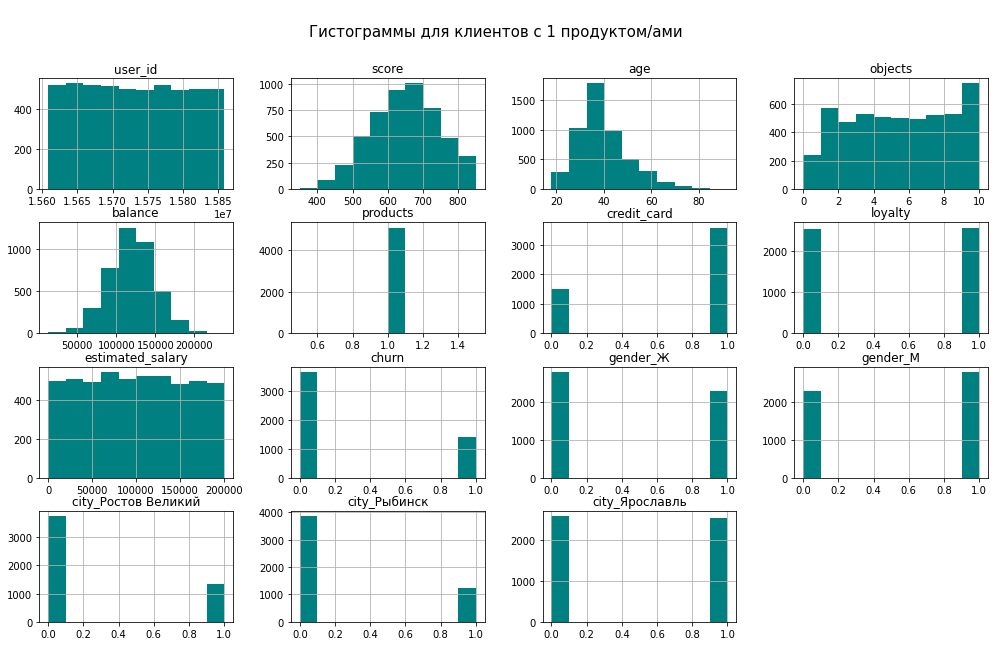

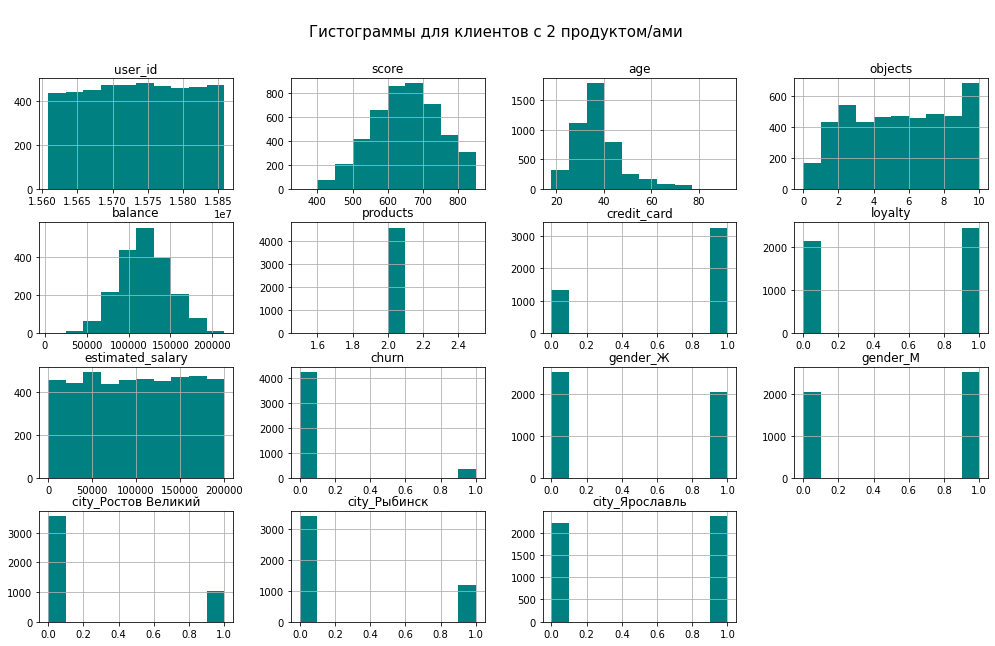

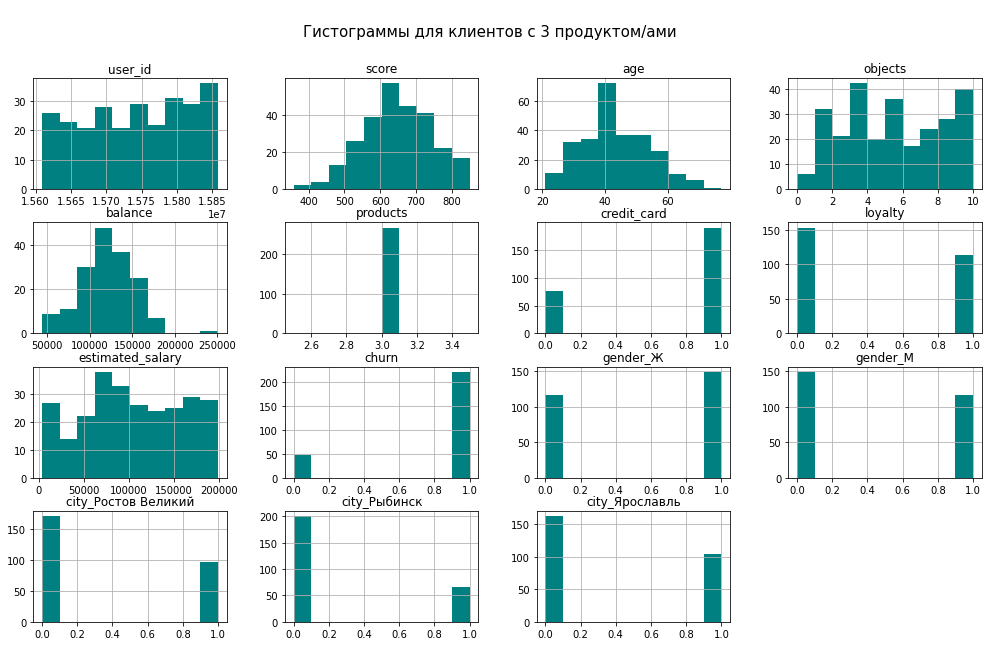

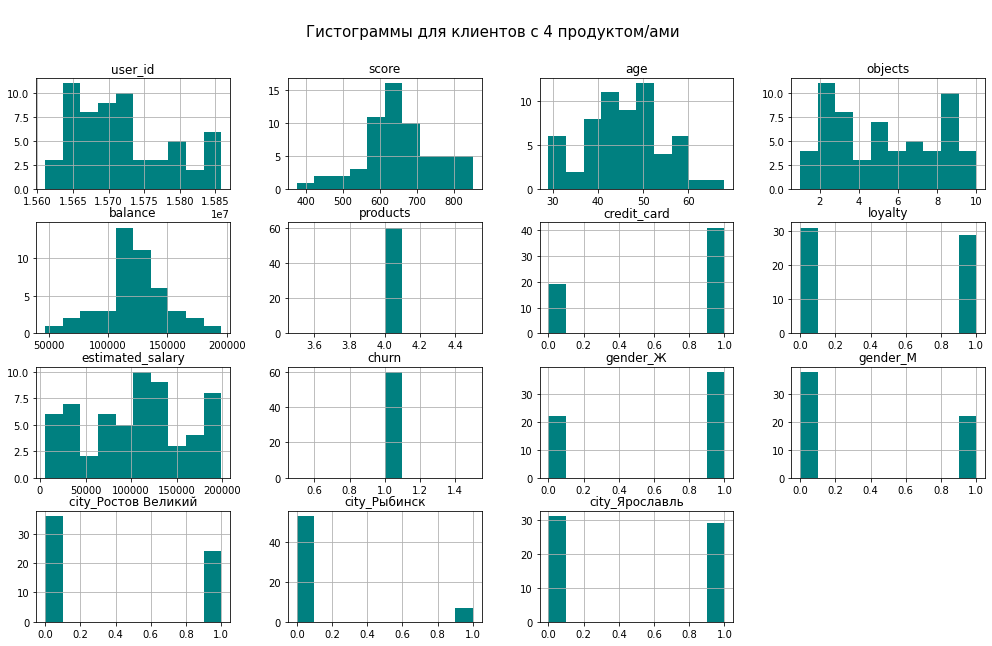

In [23]:
for сlaster in [1, 2, 3, 4]:
    bank_corr[bank_corr['products']==сlaster].hist(figsize=(17,10), color='teal')
    plt.suptitle('\nГистограммы для клиентов с {} продуктом/ами '.format(сlaster), fontsize = 15)
    plt.show()

Построим отдельные графики для двух признаков, которые наиболее сильно отличаются по медианам.

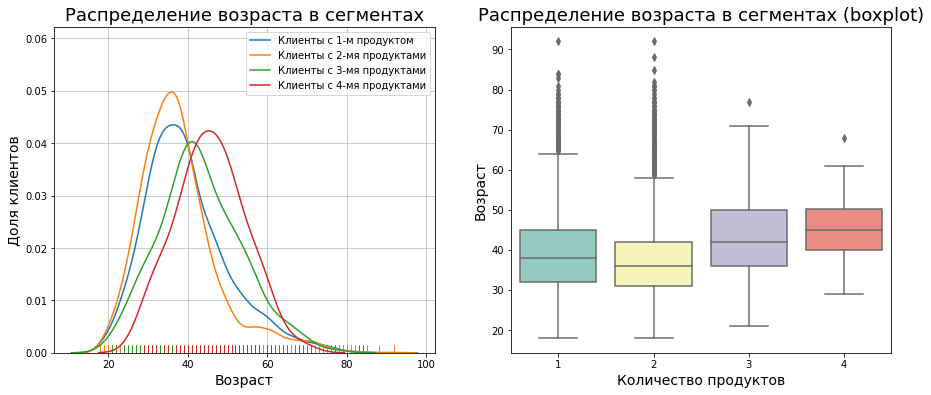

In [24]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.distplot(bank_corr[bank_corr['products']==1]['age'], rug=True, hist=False, label = 'Клиенты с 1-м продуктом',  ax = plt.subplot(1, 2, 1)) 
sns.distplot(bank_corr[bank_corr['products']==2]['age'], rug=True, hist=False, label = 'Клиенты с 2-мя продуктами',  ax = plt.subplot(1, 2, 1))
sns.distplot(bank_corr[bank_corr['products']==3]['age'], rug=True, hist=False, label = 'Клиенты с 3-мя продуктами',  ax = plt.subplot(1, 2, 1))
sns.distplot(bank_corr[bank_corr['products']==4]['age'], rug=True, hist=False, label = 'Клиенты с 4-мя продуктами',  ax = plt.subplot(1, 2, 1))
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Доля клиентов', fontsize=14)
plt.grid(color='silver')
plt.legend()
plt.title('Распределение возраста в сегментах', fontsize=18)

sns.boxplot(x = 'products', y = 'age', data=bank_corr, palette='Set3', ax = plt.subplot(1, 2, 2))
    
plt.xlabel('Количество продуктов', fontsize=14)
plt.ylabel('Возраст', fontsize=14)
plt.title('Распределение возраста в сегментах (boxplot)', fontsize=18)
plt.show() 

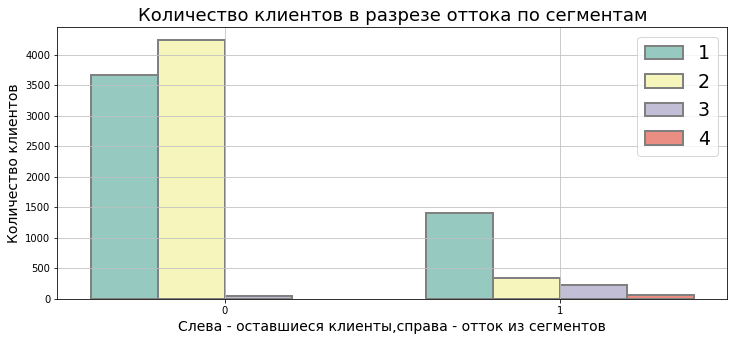

In [25]:
fig, ax = plt.subplots(figsize = (12, 5))

sns.countplot(x = 'churn', hue = 'products', data = bank, palette='Set3', linewidth=2,
                   edgecolor='grey')
plt.ylabel('Количество клиентов', fontsize=14)
plt.xlabel('Cлева - оставшиеся клиенты,справа - отток из сегментов', fontsize=14)
plt.legend(fontsize=19)
plt.grid(color='silver')
plt.title('Количество клиентов в разрезе оттока по сегментам', fontsize=18)

plt.show()    

## Проверка статистических гипотез

### *Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.*


Начнем с формулировки нулевой гипотезы:

- *H0: Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - равны.*

Исходя из Н0 формулируется альтернативная гипотеза Н1:

- *H1: Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним - различаются.*

Пороговое значение alpha примем за 5%, т.к. это стандартное значение. Применим метод Манна—Уитни.

In [26]:
alpha = 0.05

results = st.mannwhitneyu(
    bank.query('products == 1')['estimated_salary'], 
    bank.query('products == 2')['estimated_salary'], 
    alternative = 'two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не различаются.

### *Проверим гипотезу различия факта оттока между теми клиентами, которые пользуются кредитными картами, и теми, которые ими не пользуются.*


Мой выбор пал на кредитные карты, потому что по графику мне непонятно, есть ли различие. 

Сформулируем нулевую гипотезу:

- *H0: Отток клиентов, которые пользуются кредитной картой, и отток тех, которые ей не пользуются - равны.*

Формулируем альтернативную гипотезу:

- *H1: Отток клиентов, которые пользуются двумя и более продуктами банка, и отток тех, которые пользуются одним, различаются*


Пороговое значение alpha примем за 5%.

Воспользуемся Z-критерием для сравнения долей.

In [27]:
#stay = list(bank.query('churn == 0').groupby('credit_card').agg({'user_id':'count'})['user_id'])
#stay

In [28]:
#left = list(bank.query('churn == 1').groupby('credit_card').agg({'user_id':'count'})['user_id'])
#left

In [29]:
alpha = .05 # критический уровень статистической значимости

stay = list(bank.query('churn == 0').groupby('credit_card').agg({'user_id':'count'})['user_id'])
left = list(bank.query('churn == 1').groupby('credit_card').agg({'user_id':'count'})['user_id']) 

# пропорция оттока в первой группе:
p1 = left[0]/stay[0]

# пропорция оттока во второй группе:
p2 = left[1]/stay[1]

# пропорция оттока в комбинированном датасете:
p_combined = (left[0] + left[1]) / (stay[0] + stay[1])

# разница пропорций в датасетах
difference = p1 - p2 

In [30]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/stay[0] + 1/stay[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

In [31]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / stay[0] + 1 / stay[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: отток клиентов зависит от наличия кредитной карты')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: отток клиентов не зависит от наличия кредитной карты'
    )

p-значение:  0.35302590145852597
Не получилось отвергнуть нулевую гипотезу: отток клиентов не зависит от наличия кредитной карты


## Общие выводы и рекомендации

Дадим рекомендации к каждому выделенному сегменту. Предложим введение новых продуктов для сегментов, которые показывают плохое удержание.

**Сегемент 1:**
Количество банковских продуктов клиента: **1**:
- Среднее количество баллов кредитного скоринга около 650. На гистограмме баллы распределены нормально, от 400 до 850 баллов. 
- Средний возраст клиентов сегмента номер один около 40 лет. На гистограмме возраст скошен в левую часть, т.е. количество молодых клиентов преобладающее.
- Количество объектов во владении около пяти. Распределение объектов довольно равномерно. Заметен пик в области 10 объектов и яма в области 1 объекта. 
- Средний баланс равен 120 тыс. у.е., распределение нормальное. 
- Кредитную карту имеют 70% клиентов. 
- Активных клиентов ровно половина. 
- Средняя зарплата клиентов около 100 тыс. у.е., распределение равномерное от 0 до 200 тыс.
- Среди клиентов 55% мужчин и 45% женщин. 
- 50% клиентов находится в городе Ярославль, 27% клиентов из города Ростов Великий и 24% клиентов из города Рыбинск.
- *Клиентов в оттоке 28%.

**Рекомендации для сегмента 1:**
28% клиентов в оттоке это конечно меньше, чем 83% и 100%, но это все равно много. Т.к мы видим что удержание лучше для клиентов с 2 продуктами, логично предложить клиентам дополнительный продукт, предложив выгодные условия. Т.к. нам не дана информация о том, какие есть продукты в банке, а каких нет, сложно дать конкретные рекомендации. Мы знаем лишь что клиенты в этом сегменте несколько моложе чем в сегменте 3 и 4, возможно их заинтересуют продукты с выгодными условиями для поездок и перелетов. Также можно заинтересовать клиентов открытием инвестиционного или накопительного счета. 

**Сегмент 2:**
Количество банковских продуктов клиента: **2**:
- Количество баллов кредитного скоринга в медиане составляет 652 балла. Распределение нормальное. 
- Средний возраст клиентов ближе к 38 годам. Распределение скошено В левую часть, количество молодых клиентов преобладает над пожилыми. 
- Количество объектов во владение в среднем пять. На распределении есть яма в области 1 объекта и пик в области 10. 
- Баланс равен 120 тыс. у.е. в среднем. Распределение нормальное, от 50 до 200 тыс. у.е..  
- У 70% клиентов есть кредитная карта. 
- Активных клиентов 53%. 
- Медианная заработная плата составляет 100 тыс. у.е., распределение равномерно.  
- Среди клиентов 55% мужчин и 45% женщин. 
- Преобладающее количество клиентов из города Ярославль – 52%,  из города Рыбинск - 26%, из города Ростов Великий  - 23%.
- *В оттоке находится всего 8% клиентов.

**Рекомендации для сегмента 2:**
Этот сегмент показывает хорошее удержание, работать с ним сейчас нет особого смысла, нужно поднять удержание в других. 

**Сегмент 3:**
Количество банковских продуктов клиента: **3**:
- Количество баллов кредитного скоринга в  медиане - 648. Распределение нормальное. 
- Средний возраст клиентов - 43 года. В распределении есть большой пик в области 40 лет. На графике видны клиенты пожилого возраста - старше 60 лет. 
- Количество объектов во владении в среднем 5. Распределение неравномерное, присутствует пики в области 1, 3, 5 и 10 объектов. 
- Средний баланс 120 тыс. у.е.. Распределение близко к нормальному, но скошено вправо - клиентов с балансом  от 50 тыс. до 75 тыс. и более 175 тыс. относительно мало.
- 71% клиентов пользуется кредитными картами. 
- Активных клиентов 42%. 
- Медианная заработная плата 104 тыс., распределение не совсем равномерное. График проседает области от 25 до 50 тыс. 
- Среди клиентов 44% мужчин и 56% женщин. 
- Из города Ярославль количество клиентов 39%, из города Ростов Великий – 36%,  из города Рыбинск - 25%. 
- *В оттоке находится 83% клиентов.**

**Рекомендации для сегмента 3:**
Скорее всего в этом сегменте невыгодные условия для клиентов, которые обладают 3-мя продуктами. Советовать новый продукт вряд ли есть смысл, лучше воплотить оптимизацию уже имеющихся трех. Обратить внимание на клиентов из города Ростов Великий, они показывают плохое удержание, возможно это свзано с более выгодным банком конкурентом. Также в этом сегменте много женщин, они тоже показывают больший отток, возможно стоит ввести продукты которые будут включать сотрудничество и кешбек на салоны и магазины. Также стоит подумать о продуктах, для детей, т.к. женщины больше уделяют им внимания, следовательно женщинам имеющим детей можно предложить страховку на ребенка.

**Сегмент 4:**
Количество банковских продуктов клиента: **4**:
- Количество баллов кредитного скоринга в медиане - 654. На распределении есть пик с 550 до 700 баллов. Клиентов с количеством баллов от 350 до 550 относительно мало.  
- Средний возраст клиентов 46 лет. Распределение имеет множество пиков и проседаний. 
- Количество объектов во владении в среднем 5, на распределении видны пики в области 2, 3, 5, 7 и 8 объектов. 
- Средний баланс на счёте 123 тыс. Распределение имеет большой пик от 100 до 125 тыс. 
- 68% клиентов имеют кредитные карты. 
- Количество активных клиентов - 48%. 
- Средняя заработная плата 105 тыс., распределение имеет пики и проседания. 
- В сегменте находится 63% женщин и 37% мужчин. 
- Количество клиентов из города Ярославль - 48%, из города Ростов Великий – 40%, из города Рыбинск - 12%. 
- *В оттоке находятся 100% клиентов.*

**Рекомендации для сегмента 4:**
В данном сегменте преобладают возрастные категории населения, женщины и много клиентов из города Ростов Великий. Предлагать новый продукт клиентам не стоит, лучше разобраться почему клиент оформил 4 продукта и затем решил покинуть банк. Собрать отзывы в виде анкет и не гадать о причинах кажется самым оптимальным вариантом. Возможно, клиенты не смогли воспользоваться всеми услугами, т.к не смогли разобраться в них. Для этого должны быть сотрудники банка, смс-оповещения и мобильное приложение на доступном и высоком уровне. Возможно один из продуктов должен был давать выгоду в комбинации с другими, но что-то пошло не так и он не работает. Вариантов может быть множество, давать рекомендации в этом случае нелогично, ведь они могут оказаться бесполезными и будет потрачено время и деньги, а также пострадает репутация аналитического отдела или компании в которую поступил запрос.